# NN Prediction of Telco Client Churn

In [1]:
import sys
sys.path.append("..")
import numpy as np
import pandas as pd
from multilayer_perceptron import MultiLayerNN
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt

# Data Prep

In [2]:
X_train = np.loadtxt("data-churn/x_train.csv")
y_train = np.loadtxt("data-churn/y_train.csv")
X_test = np.loadtxt("data-churn/x_test.csv")
y_test = np.loadtxt("data-churn/y_test.csv")

## Normalization

In [3]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [4]:
norm_X_train = scaler.transform(X_train)
norm_X_test = scaler.transform(X_test)

## Reshaping

In [5]:
norm_X_train = norm_X_train.T
y_train = y_train.reshape(1, y_train.shape[0])
norm_X_test = norm_X_test.T
y_test = y_test.reshape(1, y_test.shape[0])

In [6]:
print(norm_X_train.shape)
print(y_train.shape)
print(norm_X_test.shape)
print(y_test.shape)

(39, 4930)
(1, 4930)
(39, 2113)
(1, 2113)


# Binary Neural Network

In [7]:
churn_nn = MultiLayerNN(norm_X_train, y_train)

## Hyperparameter Search

In [8]:
num_searches = 20
learning_rate_bounds = [0.00001, 0.0015]
lambd_bounds = [0.1, 0.9]
learning_rate_search = np.random.uniform(learning_rate_bounds[0], learning_rate_bounds[1], num_searches)
lambd_search = np.random.uniform(lambd_bounds[0], lambd_bounds[1], num_searches)

Text(0, 0.5, 'L2 Regularization Parameter ($\\lambda$)')

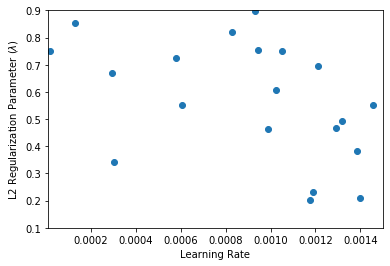

In [9]:
plt.scatter(learning_rate_search, lambd_search)
plt.xlim(learning_rate_bounds)
plt.ylim(lambd_bounds)
plt.xlabel("Learning Rate")
plt.ylabel("L2 Regularization Parameter ($\lambda$)")

In [ ]:
search_list = []

for i in range(num_searches):
    
    search_dict = {}
    search_dict["learning_rate"] = learning_rate_search[i]
    search_dict["lambd"] = lambd_search[i]
    
    churn_nn.fit_binary(layer_dimensions = [norm_X_train.shape[0], 20, 10, 5, 1],
                        learning_rate = learning_rate_search[i],
                        learning_decay_rate = 1.25e-7,
                        lambd = lambd_search[i],
                        minibatched = True,
                        minibatch_size = 256,
                        optimizer = "adam",
                        num_epochs = 5000,
                        print_cost = False)
    
    print("TRAINING:")
    pred_train, acc_train = cat_nn.predict_binary(X = norm_X_train, y = y_train)
    search_dict["train_accuracy"] = acc_train
    
    print("TESTING:")
    pred_test, acc_test = cat_nn.predict_binary(X = norm_X_test, y = y_test)
    search_dict["test_accuracy"] = acc_test
    
    search_list.append(search_dict)

In [ ]:
peak_accuracy = np.max(list(x["test_accuracy"] for x in search_list))
opt_learning_rate = 0
opt_lambd = 0
for d in search_list:
    if d["test_accuracy"] == peak_accuracy:
        opt_learning_rate = d["learning_rate"]
        opt_lambd = d["lambd"]
print("Optimal Learning Rate:", opt_learning_rate)
print("Optimal Lambda:", opt_lambd)

## Final Run

In [ ]:
# churn_nn.fit_binary(layer_dimensions = [norm_X_train.shape[0], 20, 10, 5, 1],
#                     optimizer = "adam",
#                     learning_rate = 0.0015,
#                     lambd = 0.07,
#                     learning_decay_rate = 1.25e-7,
#                     minibatched = True,
#                     minibatch_size = 256,
#                     num_epochs = 8000)

In [ ]:
churn_nn.fit_binary(layer_dimensions = [norm_X_train.shape[0], 20, 10, 5, 1],
                    learning_rate = opt_learning_rate,
                    learning_decay_rate = 1.25e-7,
                    lambd = opt_lambd,
                    minibatched = True,
                    minibatch_size = 256,
                    optimizer = "adam",
                    num_epochs = 5000,
                    print_cost = False)

### Training Performance

In [ ]:
pred_train, acc_train = churn_nn.predict_binary(norm_X_train, y_train)

In [ ]:
print("Precision:", precision_score(y_train[0], pred_train[0]))
print("Recall:", recall_score(y_train[0], pred_train[0]))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_train[0], pred_train[0]).ravel()
pd.DataFrame([[tn, fp], [fn, tp]], index = ["label: 0", "label: 1"], columns = ["predicted: 0", "predicted: 1"])

### Test Performance

In [ ]:
pred_test, acc_test = churn_nn.predict_binary(norm_X_test, y_test)

In [ ]:
print("Precision:", precision_score(y_test[0], pred_test[0]))
print("Recall:", recall_score(y_test[0], pred_test[0]))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test[0], pred_test[0]).ravel()
pd.DataFrame([[tn, fp], [fn, tp]], index = ["label: 0", "label: 1"], columns = ["predicted: 0", "predicted: 1"])